## Notebook Overview
- Load the merged ED cohort alongside raw MIMIC-IV admission and patient tables.
- Inspect encounter counts per subject and descriptive statistics for demographics.
- Map insurance type and patient age from the source tables into the working dataset.
- Examine race-specific distributions of insurance coverage and age for potential confounders.
- Save the enriched dataframe to `combined_w_age_and_insurance.csv` for later use.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
df_main = pd.read_csv('combined_data.csv')
df_main.drop(columns=['Unnamed: 0'], inplace=True)
df_main

,subject_id,stay_id,hadm_id,intime,outtime,time_of_day,temperature,heartrate,resprate,o2sat,sbp,dbp,acuity,gender,race,arrival_transport,chiefcomplaint,disposition
0,10000032,32952584,29079034.0,2180-07-22 16:24:00,2180-07-23 05:54:00,16.40,97.8,87.0,14.0,97.0,71.0,43.0,2.0,F,WHITE,AMBULANCE,Hypotension,HOME
1,10000032,33258284,22595853.0,2180-05-06 19:17:00,2180-05-06 23:30:00,19.28,98.4,70.0,16.0,97.0,106.0,63.0,3.0,F,WHITE,AMBULANCE,"Abd pain, Abdominal distention",ADMITTED
2,10000032,35968195,25742920.0,2180-08-05 20:58:00,2180-08-06 01:44:00,20.97,99.4,105.0,18.0,96.0,106.0,57.0,3.0,F,WHITE,AMBULANCE,"n/v/d, Abd pain",ADMITTED
3,10000032,38112554,22841357.0,2180-06-26 15:54:00,2180-06-26 21:31:00,15.90,98.9,88.0,18.0,97.0,116.0,88.0,3.0,F,WHITE,AMBULANCE,Abdominal distention,ADMITTED
4,10000032,39399961,29079034.0,2180-07-23 05:54:00,2180-07-23 14:00:00,5.90,98.7,77.0,16.0,98.0,96.0,50.0,2.0,F,WHITE,AMBULANCE,"Abdominal distention, Abd pain, LETHAGIC",ADMITTED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376206,19999784,34149746,25715748.0,2119-08-11 09:15:00,2119-08-11 13:40:00,9.25,98.8,92.0,18.0,100.0,122.0,77.0,3.0,M,BLACK,WALK IN,Wound eval,ADMITTED
376207,19999784,35692999,26194817.0,2119-06-18 14:21:00,2119-06-18 21:09:29,14.35,98.6,80.0,18.0,100.0,161.0,100.0,3.0,M,BLACK,WALK IN,L Leg weakness,ADMITTED
376208,19999784,37972930,24935234.0,2119-07-09 17:38:00,2119-07-10 00:04:00,17.63,98.0,91.0,16.0,99.0,148.0,90.0,2.0,M,BLACK,WALK IN,Abnormal MRI,ADMITTED
376209,19999828,30712109,29734428.0,2147-07-17 17:18:00,2147-07-18 17:34:00,17.30,98.1,83.0,18.0,100.0,107.0,75.0,2.0,F,WHITE,WALK IN,"Abd pain, Wound eval",ADMITTED


In [4]:
df_admission = pd.read_csv('mimic-iv-2.2/data/admissions.csv')df_patients = pd.read_csv('mimic-iv-2.2/data/patients.csv')

In [5]:
df_admission

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P49AFC,TRANSFER FROM HOSPITAL,HOME,Medicaid,English,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P784FA,EMERGENCY ROOM,HOME,Medicaid,English,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P19UTS,EMERGENCY ROOM,HOSPICE,Medicaid,English,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P06OTX,EMERGENCY ROOM,HOME,Medicaid,English,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P39NWO,EMERGENCY ROOM,NaN,NaN,English,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546023,19999828,25744818,2149-01-08 16:44:00,2149-01-18 17:00:00,NaN,EW EMER.,P13JMH,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicaid,English,SINGLE,WHITE,2149-01-08 09:11:00,2149-01-08 18:12:00,0
546024,19999828,29734428,2147-07-18 16:23:00,2147-08-04 18:10:00,NaN,EW EMER.,P38XL8,PHYSICIAN REFERRAL,HOME HEALTH CARE,Medicaid,English,SINGLE,WHITE,2147-07-17 17:18:00,2147-07-18 17:34:00,0
546025,19999840,21033226,2164-09-10 13:47:00,2164-09-17 13:42:00,2164-09-17 13:42:00,EW EMER.,P33612,EMERGENCY ROOM,DIED,Private,English,WIDOWED,WHITE,2164-09-10 11:09:00,2164-09-10 14:46:00,1
546026,19999840,26071774,2164-07-25 00:27:00,2164-07-28 12:15:00,NaN,EW EMER.,P036NA,EMERGENCY ROOM,HOME,Private,English,WIDOWED,WHITE,2164-07-24 21:16:00,2164-07-25 01:20:00,0


In [6]:
df_main.groupby('subject_id')
df_main[df_main['subject_id'] == 19999828]

NameError: name 'df_main' is not defined

In [59]:
df_patients

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000068,F,19,2160,2008 - 2010,NaN
3,10000084,M,72,2160,2017 - 2019,2161-02-13
4,10000102,F,27,2136,2008 - 2010,NaN
...,...,...,...,...,...,...
299707,19999828,F,46,2147,2017 - 2019,NaN
299708,19999829,F,28,2186,2008 - 2010,NaN
299709,19999840,M,58,2164,2008 - 2010,2164-09-17
299710,19999914,F,49,2158,2017 - 2019,NaN


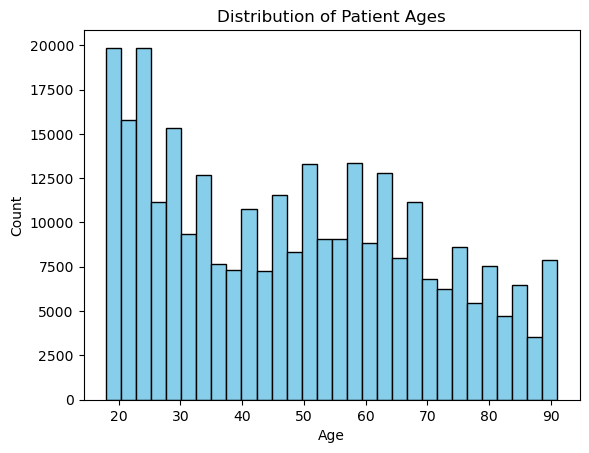

In [7]:
ages = df_patients['anchor_age'].values

plt.hist(ages, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

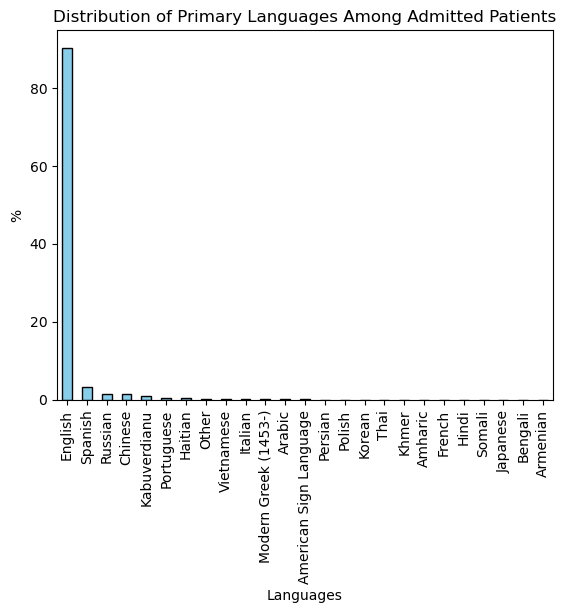

In [13]:
# Count occurrences of each unique value
value_counts = df_admission['language'].value_counts()

value_counts_normalized = (value_counts / value_counts.sum()) * 100

# Plot the bar chart
value_counts_normalized.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Languages')
plt.ylabel('%')
plt.title('Distribution of Primary Languages Among Admitted Patients')
plt.show()

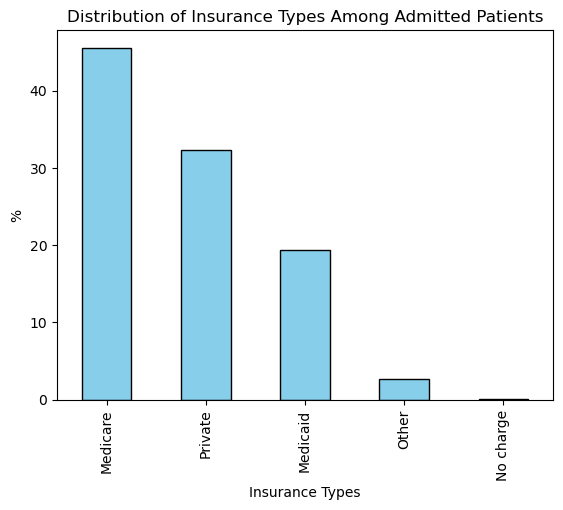

In [11]:
# Count occurrences of each unique value
value_counts = df_admission['insurance'].value_counts()

value_counts_normalized = (value_counts / value_counts.sum()) * 100

# Plot the bar chart
value_counts_normalized.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Insurance Types')
plt.ylabel('%')
plt.title('Distribution of Insurance Types Among Admitted Patients')
plt.show()

In [21]:
primary_df = pd.read_csv('combined_w_age_and_insurance.csv', index_col=0)
admission_df = primary_df[primary_df['disposition'] == 'A']

In [27]:
races = ['WHITE', 'ASIAN', 'OTHER', 'BLACK', 'HISPANIC']

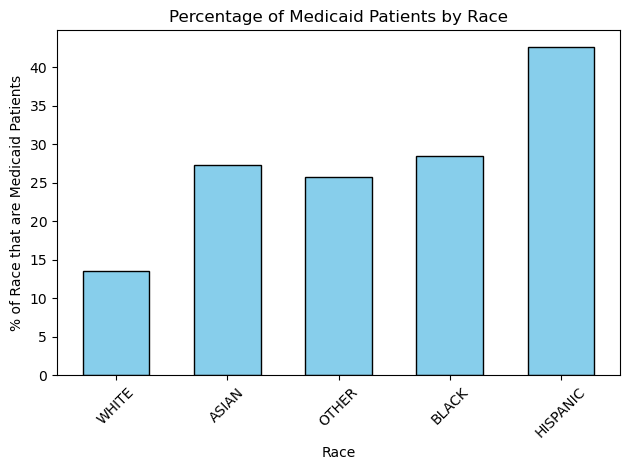

In [31]:
# Calculate the overall proportion of Medicaid
overall_medicaid = (admission_df['insurance_type'] == 'Medicaid').mean()

# Calculate proportion of Medicaid for each race and confidence intervals
proportions = []

for race in races:
    race_data = admission_df[admission_df['race'] == race]
    n_race = len(race_data)
    p_race_medicaid = ((race_data['insurance_type'] == 'Medicaid').mean() * 100)
    
    proportions.append(p_race_medicaid)

bar_positions = np.arange(len(races))
bar_width = 0.6

bars = plt.bar(bar_positions, proportions, bar_width, capsize=5, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Race')
plt.ylabel('% of Race that are Medicaid Patients')
plt.title('Percentage of Medicaid Patients by Race')
plt.xticks(bar_positions)
# Set labels to the race names
plt.xticks(bar_positions, races, rotation=45)

plt.tight_layout()
plt.show()

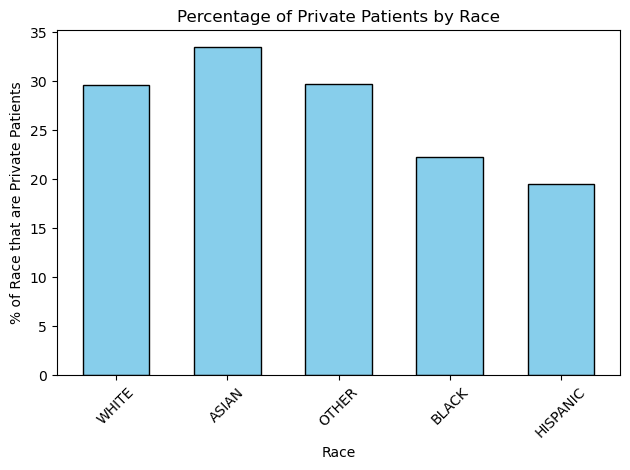

In [32]:
# Calculate the overall proportion of Medicaid
overall_priv = (admission_df['insurance_type'] == 'Private').mean()

# Calculate proportion of Medicaid for each race and confidence intervals
proportions = []

for race in races:
    race_data = admission_df[admission_df['race'] == race]
    n_race = len(race_data)
    p_race_priv = ((race_data['insurance_type'] == 'Private').mean() * 100)
    
    proportions.append(p_race_priv)

bar_positions = np.arange(len(races))
bar_width = 0.6

bars = plt.bar(bar_positions, proportions, bar_width, capsize=5, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Race')
plt.ylabel('% of Race that are Private Patients')
plt.title('Percentage of Private Patients by Race')
plt.xticks(bar_positions)
# Set labels to the race names
plt.xticks(bar_positions, races, rotation=45)

plt.tight_layout()
plt.show()

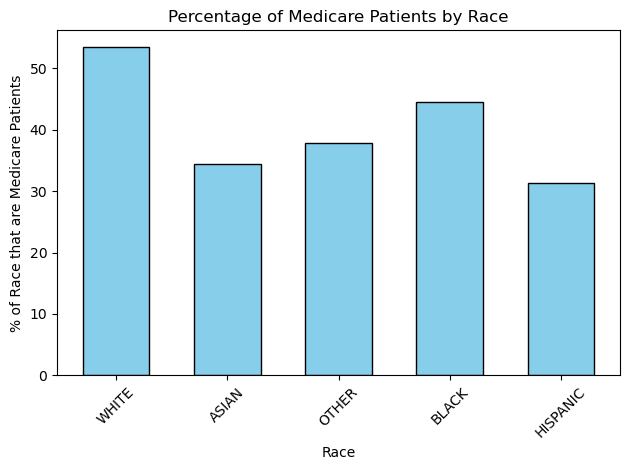

In [33]:
# Calculate the overall proportion of Medicaid
overall_medicare = (admission_df['insurance_type'] == 'Medicare').mean()

# Calculate proportion of Medicaid for each race and confidence intervals
proportions = []

for race in races:
    race_data = admission_df[admission_df['race'] == race]
    n_race = len(race_data)
    p_race_medicare = ((race_data['insurance_type'] == 'Medicare').mean() * 100)
    
    proportions.append(p_race_medicare)

bar_positions = np.arange(len(races))
bar_width = 0.6

bars = plt.bar(bar_positions, proportions, bar_width, capsize=5, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Race')
plt.ylabel('% of Race that are Medicare Patients')
plt.title('Percentage of Medicare Patients by Race')
plt.xticks(bar_positions)
# Set labels to the race names
plt.xticks(bar_positions, races, rotation=45)

plt.tight_layout()
plt.show()

In the following code, we map the insurance type from the admissions dataframe to our main dataframe. Note this makes the assumption that insurance type for a specific individual does not change over multiple visits.

In [63]:
# Add a new column in df_main called ‘insurance_type’ and populate all entries with ‘NA’
df_main['insurance_type'] = 'NA'

# Create a dictionary from df_admission with subject_id as keys and insurance as values
insurance_dict = df_admission.set_index('subject_id')['insurance'].to_dict()

# Update the insurance_type in df_main based on the dictionary
df_main['insurance_type'] = df_main['subject_id'].map(insurance_dict).fillna('NA')

df_main

,subject_id,stay_id,hadm_id,intime,outtime,time_of_day,temperature,heartrate,resprate,o2sat,sbp,dbp,acuity,gender,race,arrival_transport,chiefcomplaint,disposition,insurance_type
0,10000032,32952584,29079034.0,2180-07-22 16:24:00,2180-07-23 05:54:00,16.40,97.8,87.0,14.0,97.0,71.0,43.0,2.0,F,WHITE,AMBULANCE,Hypotension,HOME,Medicaid
1,10000032,33258284,22595853.0,2180-05-06 19:17:00,2180-05-06 23:30:00,19.28,98.4,70.0,16.0,97.0,106.0,63.0,3.0,F,WHITE,AMBULANCE,"Abd pain, Abdominal distention",ADMITTED,Medicaid
2,10000032,35968195,25742920.0,2180-08-05 20:58:00,2180-08-06 01:44:00,20.97,99.4,105.0,18.0,96.0,106.0,57.0,3.0,F,WHITE,AMBULANCE,"n/v/d, Abd pain",ADMITTED,Medicaid
3,10000032,38112554,22841357.0,2180-06-26 15:54:00,2180-06-26 21:31:00,15.90,98.9,88.0,18.0,97.0,116.0,88.0,3.0,F,WHITE,AMBULANCE,Abdominal distention,ADMITTED,Medicaid
4,10000032,39399961,29079034.0,2180-07-23 05:54:00,2180-07-23 14:00:00,5.90,98.7,77.0,16.0,98.0,96.0,50.0,2.0,F,WHITE,AMBULANCE,"Abdominal distention, Abd pain, LETHAGIC",ADMITTED,Medicaid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376206,19999784,34149746,25715748.0,2119-08-11 09:15:00,2119-08-11 13:40:00,9.25,98.8,92.0,18.0,100.0,122.0,77.0,3.0,M,BLACK,WALK IN,Wound eval,ADMITTED,Medicaid
376207,19999784,35692999,26194817.0,2119-06-18 14:21:00,2119-06-18 21:09:29,14.35,98.6,80.0,18.0,100.0,161.0,100.0,3.0,M,BLACK,WALK IN,L Leg weakness,ADMITTED,Medicaid
376208,19999784,37972930,24935234.0,2119-07-09 17:38:00,2119-07-10 00:04:00,17.63,98.0,91.0,16.0,99.0,148.0,90.0,2.0,M,BLACK,WALK IN,Abnormal MRI,ADMITTED,Medicaid
376209,19999828,30712109,29734428.0,2147-07-17 17:18:00,2147-07-18 17:34:00,17.30,98.1,83.0,18.0,100.0,107.0,75.0,2.0,F,WHITE,WALK IN,"Abd pain, Wound eval",ADMITTED,Medicaid


In [64]:
count_na_admitted = df_main[(df_main['insurance_type'] == 'NA') & (df_main['disposition'] == 'ADMITTED')].shape[0]

df_main.loc[(df_main['insurance_type'] == 'NA') & (df_main['disposition'] == 'ADMITTED'), 'insurance_type'] = 'Unknown/Other'
df_main.loc[(df_main['insurance_type'] == 'Other'), 'insurance_type'] = 'Unknown/Other'
df_main.loc[(df_main['insurance_type'] == 'No charge'), 'insurance_type'] = 'Unknown/Other'

print(f"Count of rows with insurance_type 'NA' and disposition 'ADMITTED': {count_na_admitted}")

Count of rows with insurance_type 'NA' and disposition 'ADMITTED': 1378


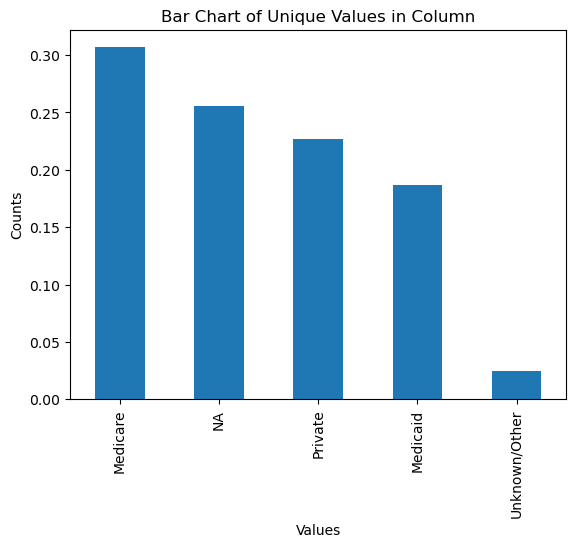

In [65]:
value_counts = df_main['insurance_type'].value_counts()

value_counts_normalized = value_counts / value_counts.sum()

# Plot the bar chart
value_counts_normalized.plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Bar Chart of Unique Values in Column')
plt.show()

In [66]:
# Add an empty column called 'age' in df_main
df_main['age'] = None

# Convert 'intime' in df_main to datetime and extract the year
df_main['intime_year'] = pd.to_datetime(df_main['intime']).dt.year

# Create a dictionary from df_patients with subject_id as keys and a tuple of (anchor_age, anchor_year) as values
age_year_dict = df_patients.set_index('subject_id')[['anchor_age', 'anchor_year']].to_dict('index')

# Function to calculate age based on intime year and anchor year/age
def calculate_age(subject_id, intime_year):
    if subject_id in age_year_dict:
        anchor_age = age_year_dict[subject_id]['anchor_age']
        anchor_year = age_year_dict[subject_id]['anchor_year']
        return anchor_age + (intime_year - anchor_year)
    return None

# Apply the function to calculate the age and populate the 'age' column
df_main['age'] = df_main.apply(lambda row: calculate_age(row['subject_id'], row['intime_year']), axis=1)

# Drop the temporary 'intime_year' column
df_main.drop(columns=['intime_year'], inplace=True)

df_main

,subject_id,stay_id,hadm_id,intime,outtime,time_of_day,temperature,heartrate,resprate,o2sat,sbp,dbp,acuity,gender,race,arrival_transport,chiefcomplaint,disposition,insurance_type,age
0,10000032,32952584,29079034.0,2180-07-22 16:24:00,2180-07-23 05:54:00,16.40,97.8,87.0,14.0,97.0,71.0,43.0,2.0,F,WHITE,AMBULANCE,Hypotension,HOME,Medicaid,52
1,10000032,33258284,22595853.0,2180-05-06 19:17:00,2180-05-06 23:30:00,19.28,98.4,70.0,16.0,97.0,106.0,63.0,3.0,F,WHITE,AMBULANCE,"Abd pain, Abdominal distention",ADMITTED,Medicaid,52
2,10000032,35968195,25742920.0,2180-08-05 20:58:00,2180-08-06 01:44:00,20.97,99.4,105.0,18.0,96.0,106.0,57.0,3.0,F,WHITE,AMBULANCE,"n/v/d, Abd pain",ADMITTED,Medicaid,52
3,10000032,38112554,22841357.0,2180-06-26 15:54:00,2180-06-26 21:31:00,15.90,98.9,88.0,18.0,97.0,116.0,88.0,3.0,F,WHITE,AMBULANCE,Abdominal distention,ADMITTED,Medicaid,52
4,10000032,39399961,29079034.0,2180-07-23 05:54:00,2180-07-23 14:00:00,5.90,98.7,77.0,16.0,98.0,96.0,50.0,2.0,F,WHITE,AMBULANCE,"Abdominal distention, Abd pain, LETHAGIC",ADMITTED,Medicaid,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376206,19999784,34149746,25715748.0,2119-08-11 09:15:00,2119-08-11 13:40:00,9.25,98.8,92.0,18.0,100.0,122.0,77.0,3.0,M,BLACK,WALK IN,Wound eval,ADMITTED,Medicaid,57
376207,19999784,35692999,26194817.0,2119-06-18 14:21:00,2119-06-18 21:09:29,14.35,98.6,80.0,18.0,100.0,161.0,100.0,3.0,M,BLACK,WALK IN,L Leg weakness,ADMITTED,Medicaid,57
376208,19999784,37972930,24935234.0,2119-07-09 17:38:00,2119-07-10 00:04:00,17.63,98.0,91.0,16.0,99.0,148.0,90.0,2.0,M,BLACK,WALK IN,Abnormal MRI,ADMITTED,Medicaid,57
376209,19999828,30712109,29734428.0,2147-07-17 17:18:00,2147-07-18 17:34:00,17.30,98.1,83.0,18.0,100.0,107.0,75.0,2.0,F,WHITE,WALK IN,"Abd pain, Wound eval",ADMITTED,Medicaid,46


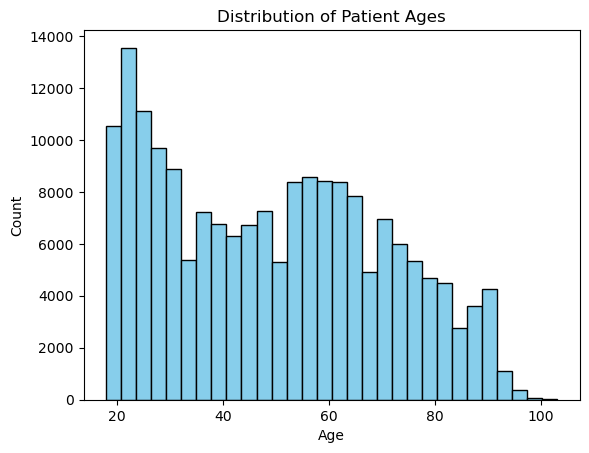

In [67]:
ages = df_main.drop_duplicates(subset='subject_id', keep='first')['age'].values

plt.hist(ages, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [68]:
frequent_races = ['WHITE', 'BLACK', 'HISPANIC', 'ASIAN']

# Update 'disposition' column
conditions = (df_main['disposition'] == 'ADMITTED') | (df_main['disposition'] == 'TRANSFER')
df_main.loc[conditions, 'disposition'] = 'A'
df_main.loc[~conditions, 'disposition'] = 'N'

# Update 'race' column
df_main.loc[~df_main['race'].isin(frequent_races), 'race'] = 'OTHER'

In [69]:
df_main

,subject_id,stay_id,hadm_id,intime,outtime,time_of_day,temperature,heartrate,resprate,o2sat,sbp,dbp,acuity,gender,race,arrival_transport,chiefcomplaint,disposition,insurance_type,age
0,10000032,32952584,29079034.0,2180-07-22 16:24:00,2180-07-23 05:54:00,16.40,97.8,87.0,14.0,97.0,71.0,43.0,2.0,F,WHITE,AMBULANCE,Hypotension,N,Medicaid,52
1,10000032,33258284,22595853.0,2180-05-06 19:17:00,2180-05-06 23:30:00,19.28,98.4,70.0,16.0,97.0,106.0,63.0,3.0,F,WHITE,AMBULANCE,"Abd pain, Abdominal distention",A,Medicaid,52
2,10000032,35968195,25742920.0,2180-08-05 20:58:00,2180-08-06 01:44:00,20.97,99.4,105.0,18.0,96.0,106.0,57.0,3.0,F,WHITE,AMBULANCE,"n/v/d, Abd pain",A,Medicaid,52
3,10000032,38112554,22841357.0,2180-06-26 15:54:00,2180-06-26 21:31:00,15.90,98.9,88.0,18.0,97.0,116.0,88.0,3.0,F,WHITE,AMBULANCE,Abdominal distention,A,Medicaid,52
4,10000032,39399961,29079034.0,2180-07-23 05:54:00,2180-07-23 14:00:00,5.90,98.7,77.0,16.0,98.0,96.0,50.0,2.0,F,WHITE,AMBULANCE,"Abdominal distention, Abd pain, LETHAGIC",A,Medicaid,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376206,19999784,34149746,25715748.0,2119-08-11 09:15:00,2119-08-11 13:40:00,9.25,98.8,92.0,18.0,100.0,122.0,77.0,3.0,M,BLACK,WALK IN,Wound eval,A,Medicaid,57
376207,19999784,35692999,26194817.0,2119-06-18 14:21:00,2119-06-18 21:09:29,14.35,98.6,80.0,18.0,100.0,161.0,100.0,3.0,M,BLACK,WALK IN,L Leg weakness,A,Medicaid,57
376208,19999784,37972930,24935234.0,2119-07-09 17:38:00,2119-07-10 00:04:00,17.63,98.0,91.0,16.0,99.0,148.0,90.0,2.0,M,BLACK,WALK IN,Abnormal MRI,A,Medicaid,57
376209,19999828,30712109,29734428.0,2147-07-17 17:18:00,2147-07-18 17:34:00,17.30,98.1,83.0,18.0,100.0,107.0,75.0,2.0,F,WHITE,WALK IN,"Abd pain, Wound eval",A,Medicaid,46


In [70]:
df_main.to_csv('combined_w_age_and_insurance.csv')

In [71]:
df_main = pd.read_csv('combined_w_age_and_insurance.csv')
df_main.drop(columns=['Unnamed: 0'], inplace=True)
df_main

,subject_id,stay_id,hadm_id,intime,outtime,time_of_day,temperature,heartrate,resprate,o2sat,sbp,dbp,acuity,gender,race,arrival_transport,chiefcomplaint,disposition,insurance_type,age
0,10000032,32952584,29079034.0,2180-07-22 16:24:00,2180-07-23 05:54:00,16.40,97.8,87.0,14.0,97.0,71.0,43.0,2.0,F,WHITE,AMBULANCE,Hypotension,N,Medicaid,52
1,10000032,33258284,22595853.0,2180-05-06 19:17:00,2180-05-06 23:30:00,19.28,98.4,70.0,16.0,97.0,106.0,63.0,3.0,F,WHITE,AMBULANCE,"Abd pain, Abdominal distention",A,Medicaid,52
2,10000032,35968195,25742920.0,2180-08-05 20:58:00,2180-08-06 01:44:00,20.97,99.4,105.0,18.0,96.0,106.0,57.0,3.0,F,WHITE,AMBULANCE,"n/v/d, Abd pain",A,Medicaid,52
3,10000032,38112554,22841357.0,2180-06-26 15:54:00,2180-06-26 21:31:00,15.90,98.9,88.0,18.0,97.0,116.0,88.0,3.0,F,WHITE,AMBULANCE,Abdominal distention,A,Medicaid,52
4,10000032,39399961,29079034.0,2180-07-23 05:54:00,2180-07-23 14:00:00,5.90,98.7,77.0,16.0,98.0,96.0,50.0,2.0,F,WHITE,AMBULANCE,"Abdominal distention, Abd pain, LETHAGIC",A,Medicaid,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376206,19999784,34149746,25715748.0,2119-08-11 09:15:00,2119-08-11 13:40:00,9.25,98.8,92.0,18.0,100.0,122.0,77.0,3.0,M,BLACK,WALK IN,Wound eval,A,Medicaid,57
376207,19999784,35692999,26194817.0,2119-06-18 14:21:00,2119-06-18 21:09:29,14.35,98.6,80.0,18.0,100.0,161.0,100.0,3.0,M,BLACK,WALK IN,L Leg weakness,A,Medicaid,57
376208,19999784,37972930,24935234.0,2119-07-09 17:38:00,2119-07-10 00:04:00,17.63,98.0,91.0,16.0,99.0,148.0,90.0,2.0,M,BLACK,WALK IN,Abnormal MRI,A,Medicaid,57
376209,19999828,30712109,29734428.0,2147-07-17 17:18:00,2147-07-18 17:34:00,17.30,98.1,83.0,18.0,100.0,107.0,75.0,2.0,F,WHITE,WALK IN,"Abd pain, Wound eval",A,Medicaid,46


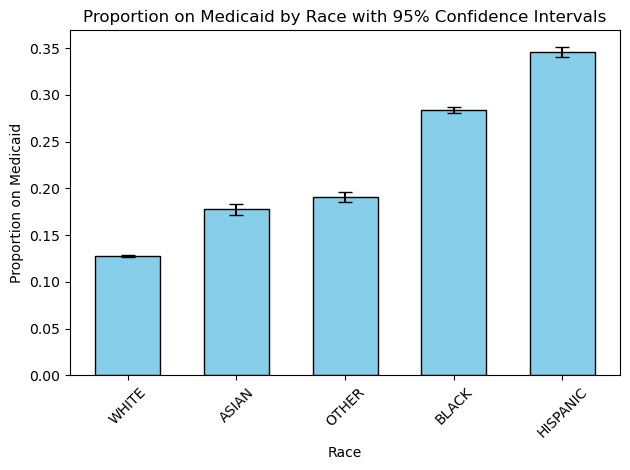

In [72]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Calculate the overall proportion of Medicaid
overall_medicaid = (df_main['insurance_type'] == 'Medicaid').mean()

# Function to calculate confidence interval for a proportion
def proportion_confidence_interval(proportion, n, confidence=0.95):
    z = norm.ppf(1 - (1 - confidence) / 2)
    margin = z * np.sqrt((proportion * (1 - proportion)) / n)
    return proportion - margin, proportion + margin

# Calculate proportion of Medicaid for each race and confidence intervals
proportions = []
conf_intervals = []
races = df_main['race'].unique()

for race in races:
    race_data = df_main[df_main['race'] == race]
    n_race = len(race_data)
    p_race_medicaid = (race_data['insurance_type'] == 'Medicaid').mean()
    
    lower_ci, upper_ci = proportion_confidence_interval(p_race_medicaid, n_race)
    
    proportions.append(p_race_medicaid)
    conf_intervals.append((p_race_medicaid - lower_ci, upper_ci - p_race_medicaid))


bar_positions = np.arange(len(races))
bar_width = 0.6

bars = plt.bar(bar_positions, proportions, bar_width, yerr=np.array(conf_intervals).T, capsize=5, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Race')
plt.ylabel('Proportion on Medicaid')
plt.title('Proportion on Medicaid by Race with 95% Confidence Intervals')
plt.xticks(bar_positions)
# Set labels to the race names
plt.xticks(bar_positions, races, rotation=45)

plt.tight_layout()
plt.show()


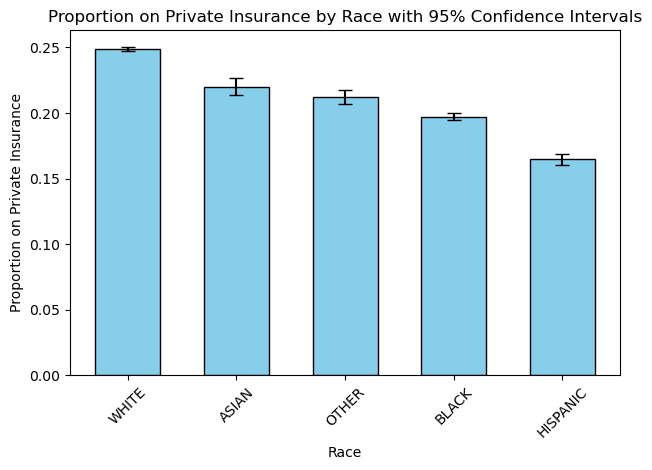

In [73]:
# Calculate the overall proportion of Medicaid
overall_private = (df_main['insurance_type'] == 'Private').mean()

proportions = []
conf_intervals = []
races = df_main['race'].unique()

for race in races:
    race_data = df_main[df_main['race'] == race]
    n_race = len(race_data)
    p_race_medicaid = (race_data['insurance_type'] == 'Private').mean()
    
    lower_ci, upper_ci = proportion_confidence_interval(p_race_medicaid, n_race)
    
    proportions.append(p_race_medicaid)
    conf_intervals.append((p_race_medicaid - lower_ci, upper_ci - p_race_medicaid))


bar_positions = np.arange(len(races))
bar_width = 0.6

bars = plt.bar(bar_positions, proportions, bar_width, yerr=np.array(conf_intervals).T, capsize=5, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Race')
plt.ylabel('Proportion on Private Insurance')
plt.title('Proportion on Private Insurance by Race with 95% Confidence Intervals')
plt.xticks(bar_positions)
# Set labels to the race names
plt.xticks(bar_positions, races, rotation=45)

plt.tight_layout()
plt.show()

Insurance is only provided for the admitted class, but there is a pretty clear difference in insurance types and races, which is likely a contributing factor to the ocurrence of admission.

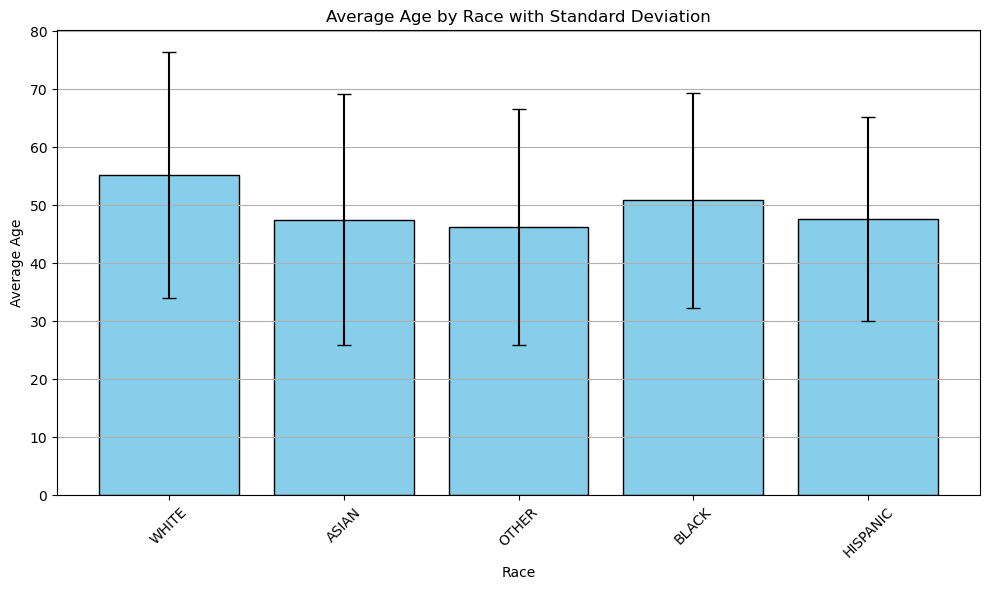

In [74]:
# Calculate the average age and standard deviation for each race
average_ages = []
std_devs = []
races = df_main['race'].unique()

for race in races:
    race_data = df_main[df_main['race'] == race]
    
    # Calculate average age and standard deviation
    avg_age = race_data['age'].mean()
    std_dev = race_data['age'].std()
    
    average_ages.append(avg_age)
    std_devs.append(std_dev)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for average age with standard deviation as error bars
ax.bar(races, average_ages, yerr=std_devs, capsize=5, color='skyblue', edgecolor='black')
ax.set_xlabel('Race')
ax.set_ylabel('Average Age')
ax.set_title('Average Age by Race with Standard Deviation')
ax.yaxis.grid(True)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Age is distributed evenly for each race, well within each other's standard deviations.

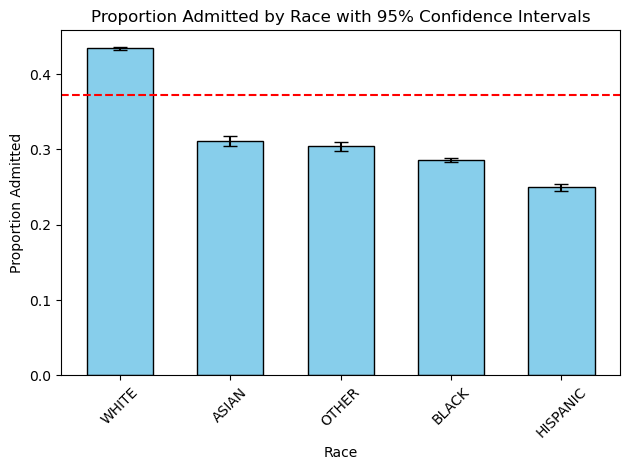

In [76]:
# Calculate the overall proportion of Medicaid
overall_admitted = (df_main['disposition'] == 'A').mean()

proportions = []
conf_intervals = []
races = df_main['race'].unique()

for race in races:
    race_data = df_main[df_main['race'] == race]
    n_race = len(race_data)
    p_race_admitted = (race_data['disposition'] == 'A').mean()
    
    lower_ci, upper_ci = proportion_confidence_interval(p_race_admitted, n_race)
    
    proportions.append(p_race_admitted)
    conf_intervals.append((p_race_admitted - lower_ci, upper_ci - p_race_admitted))


bar_positions = np.arange(len(races))
bar_width = 0.6

bars = plt.bar(bar_positions, proportions, bar_width, yerr=np.array(conf_intervals).T, capsize=5, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Race')
plt.ylabel('Proportion Admitted')
plt.title('Proportion Admitted by Race with 95% Confidence Intervals')
plt.xticks(bar_positions)
# Set labels to the race names
plt.xticks(bar_positions, races, rotation=45)
plt.axhline(y=overall_admitted, color='r', linestyle='--')

plt.tight_layout()
plt.show()